In [1]:
#!pip install opencv-python

# Loading the dataset + changing the image resolution

#### data is obtained from Kaggle (https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste/data)

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

#normalization is also done here

images = []
labels = []

main_directory = "C:/Users/crist/Desktop/DAT402/archive (1)"

for animal in tqdm(os.listdir(main_directory)):
    for image_name in os.listdir(os.path.join(main_directory, animal)):
        img_path = os.path.join(main_directory, animal, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (28, 28))
            resized_img = resized_img / 255
            images.append(resized_img)
            labels.append(animal)

images = np.array(images,dtype = 'float32')


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [05:12<00:00, 13.61s/it]


### The list of animals in the dataset

In [2]:
# animals
unique_labels_sorted = sorted(set(labels))
print("Unique labels available (sorted):")
print(unique_labels_sorted)

Unique labels available (sorted):
['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']


In [3]:
images.shape

(13711, 28, 28, 3)

In [5]:
labels = np.array(labels)
labels.shape

(13711,)

### Split the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [6]:
X_train.shape

(10968, 28, 28, 3)

In [8]:
m = len(y_train)
m

10968

### A few images from the dataset

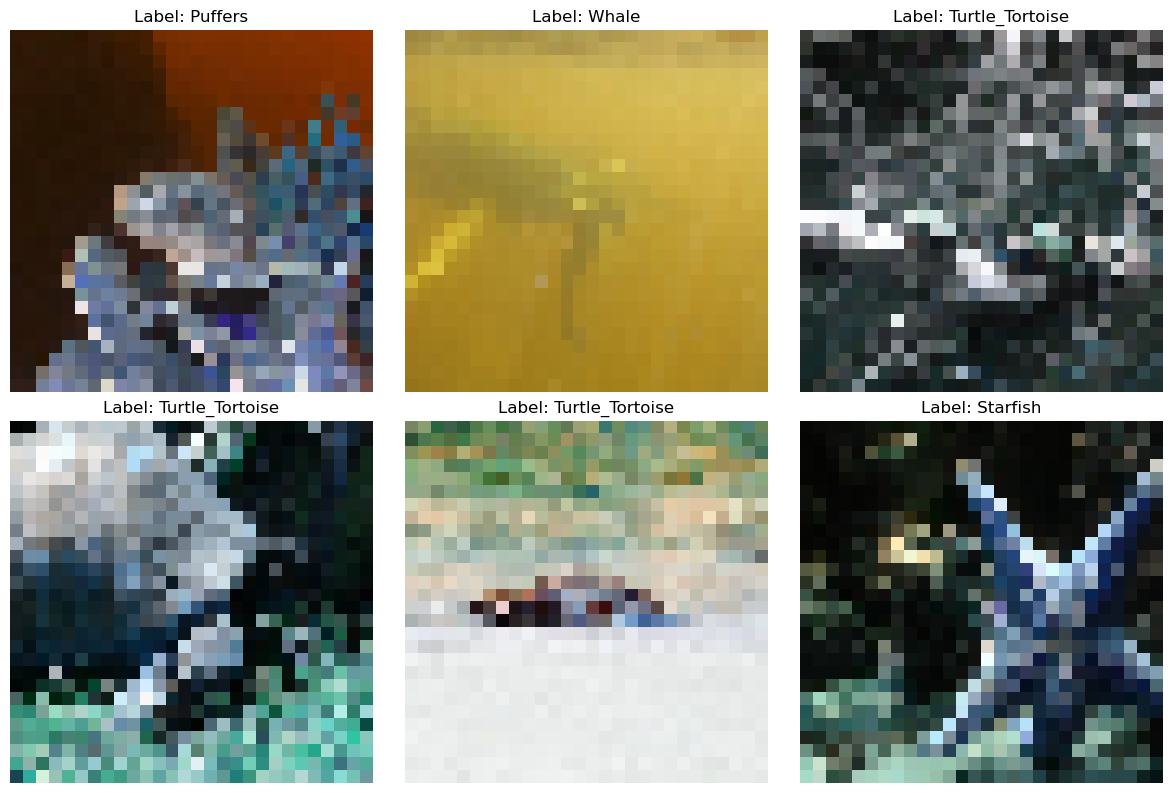

In [9]:
# plot the first few train images
import matplotlib.pyplot as plt

# Display the first 6 images from the training dataset
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i])  # Display the image
    plt.title(f"Label: {y_train[i]}")  # Display the corresponding label
    plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()

In [11]:
# normalization is already done hence the output

print('image value range:', (np.min(X_train), np.max(X_train)))

image value range: (0.0, 1.0)


### More visualization

Class proportions in the whole dataset:
{'Clams': 0.03624826781416381, 'Corals': 0.03646707023557728, 'Crabs': 0.03639413609510612, 'Dolphin': 0.057034497848442854, 'Eel': 0.03624826781416381, 'Fish': 0.03602946539275035, 'Jelly Fish': 0.06162934869812559, 'Lobster': 0.03639413609510612, 'Nudibranchs': 0.03646707023557728, 'Octopus': 0.040988986944788856, 'Otter': 0.03646707023557728, 'Penguin': 0.035154255707096495, 'Puffers': 0.03872802859018307, 'Sea Rays': 0.0377069506235869, 'Sea Urchins': 0.04222886733279848, 'Seahorse': 0.03486251914521187, 'Seal': 0.03019473415505798, 'Sharks': 0.04303114287798118, 'Shrimp': 0.03559186054992342, 'Squid': 0.03522718984756765, 'Starfish': 0.03639413609510612, 'Turtle_Tortoise': 0.1387936693166071, 'Whale': 0.0417183283495004}


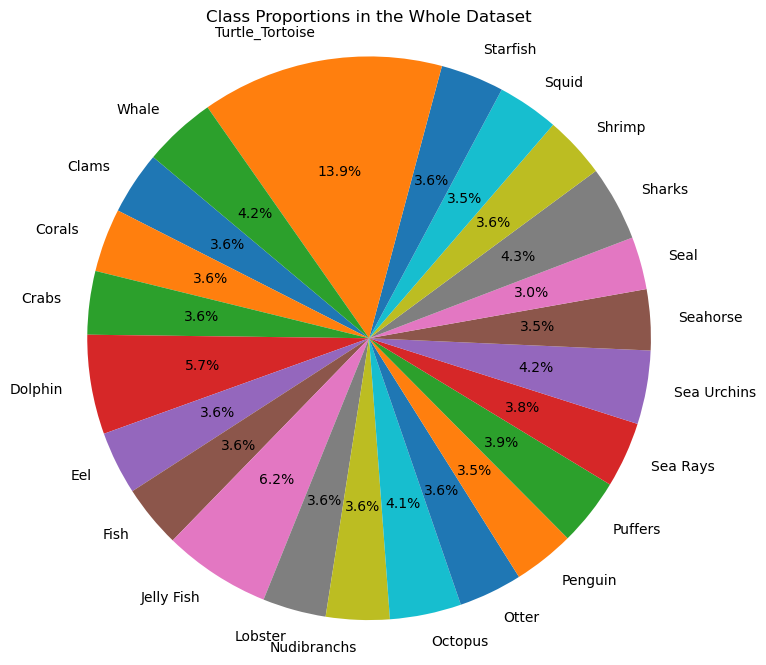

In [12]:
from collections import Counter

# Assuming 'labels' contains the labels of the entire dataset
class_counts_whole_dataset = Counter(labels)
total_samples = len(labels)

class_proportions_whole_dataset = {label: count / total_samples for label, count in class_counts_whole_dataset.items()}
print("Class proportions in the whole dataset:")
print(class_proportions_whole_dataset)

import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'labels' contains the labels of the entire dataset
class_counts_whole_dataset = Counter(labels)

# Calculate proportions
total_samples = len(labels)
class_proportions_whole_dataset = [count / total_samples for count in class_counts_whole_dataset.values()]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_proportions_whole_dataset, labels=class_counts_whole_dataset.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Proportions in the Whole Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Class proportions in the training dataset:
{'Puffers': 0.03838439095550693, 'Whale': 0.0413019693654267, 'Turtle_Tortoise': 0.13977024070021882, 'Starfish': 0.03701677607585704, 'Jelly Fish': 0.059901531728665205, 'Octopus': 0.04230488694383661, 'Clams': 0.035193289569657185, 'Seahorse': 0.034737417943107224, 'Fish': 0.03601385849744712, 'Corals': 0.03646973012399708, 'Penguin': 0.033825674690007294, 'Lobster': 0.037199124726477024, 'Seal': 0.0299963530269876, 'Sharks': 0.04157549234135667, 'Eel': 0.03637855579868709, 'Squid': 0.03537563822027717, 'Sea Rays': 0.03710795040116703, 'Sea Urchins': 0.04349015317286652, 'Dolphin': 0.05762217359591539, 'Nudibranchs': 0.036560904449307076, 'Crabs': 0.03601385849744712, 'Otter': 0.037654996353026986, 'Shrimp': 0.036105032822757115}


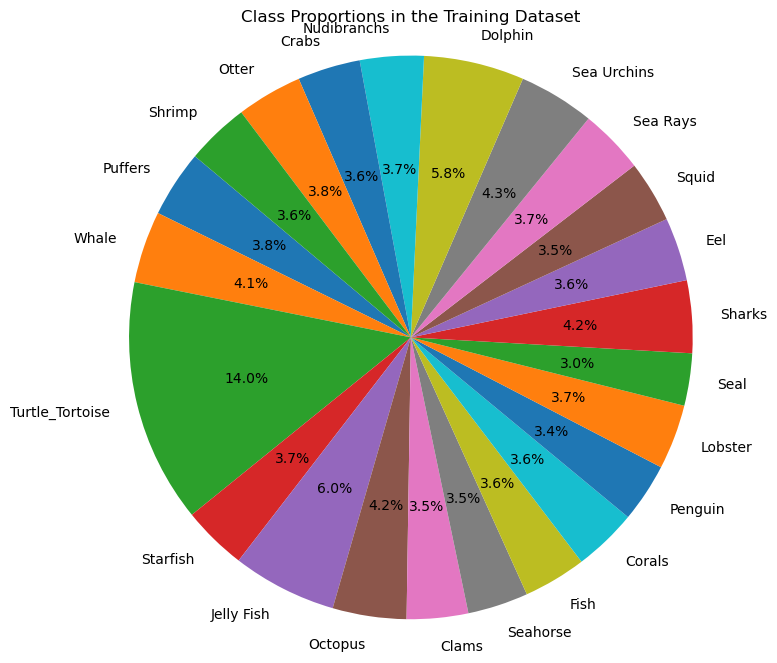

In [13]:
from collections import Counter

# Assuming 'y_train' contains the labels of the training dataset
class_counts_train = Counter(y_train)
total_samples_train = len(y_train)

class_proportions_train = {label: count / total_samples_train for label, count in class_counts_train.items()}
print("Class proportions in the training dataset:")
print(class_proportions_train)

# Assuming 'y_train' contains the labels of the training dataset
class_counts_train = Counter(y_train)

# Calculate proportions
total_samples_train = len(y_train)
class_proportions_train = [count / total_samples_train for count in class_counts_train.values()]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_proportions_train, labels=class_counts_train.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Proportions in the Training Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## K-means clustering

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


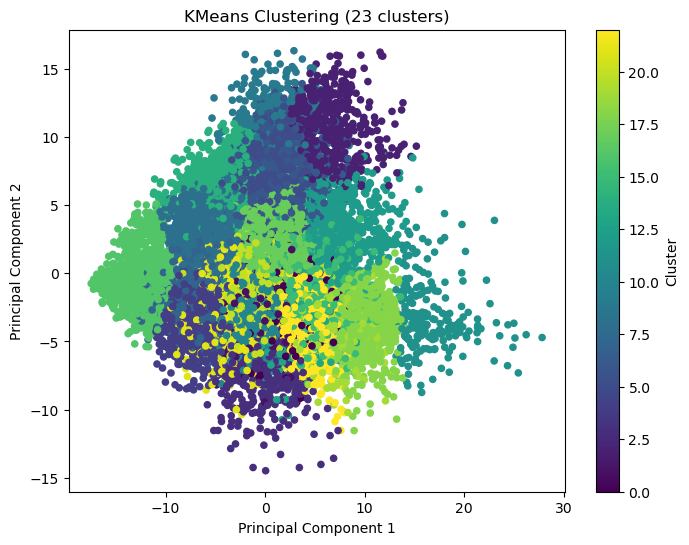

In [49]:
# clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Flatten each image to be suitable for KMeans
flattened_images = images.reshape(images.shape[0], -1)  # Flatten images to 1D

# Feature extraction using PCA (for demonstration)
# You might want to use different feature extraction techniques depending on your dataset
pca = PCA(n_components=100)  # Assuming 100 components
reduced_features = pca.fit_transform(flattened_images)  # Apply PCA to reduce dimensionality

# Perform KMeans clustering
num_classes = 23  # Number of different animal classes
kmeans = KMeans(n_clusters=num_classes, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)  # Fit KMeans and get cluster labels

# Visualize the clusters (for demonstration)
# Note: Visualizing high-dimensional data is complex; we'll use PCA components for simplicity
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=20)
plt.title('KMeans Clustering (23 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\crist\anaconda3\lib\site-packages\sklearn\clust

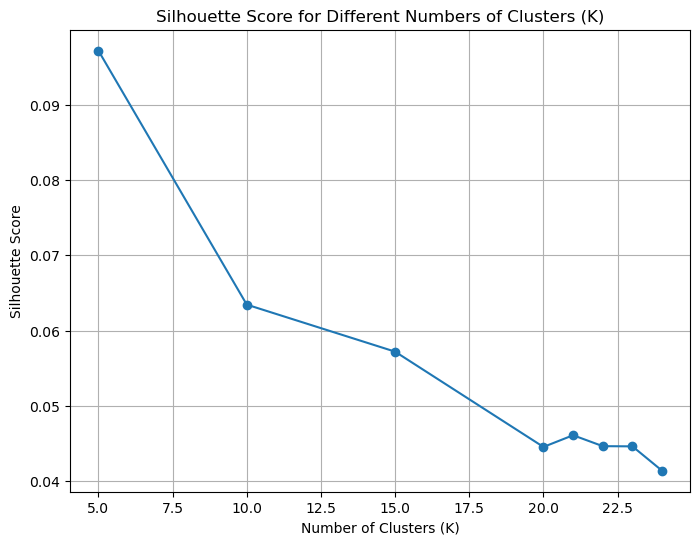

In [14]:
# Perform KMeans clustering with different numbers of clusters (K)
from sklearn.metrics import silhouette_score
k_values = [5, 10, 15, 20, 21, 22, 23, 24]  # Experiment with different numbers of clusters
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(flattened_images)
    silhouette = silhouette_score(flattened_images, cluster_labels)
    silhouette_scores.append(silhouette)

# Plot Silhouette scores for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## t-SNE for visualization

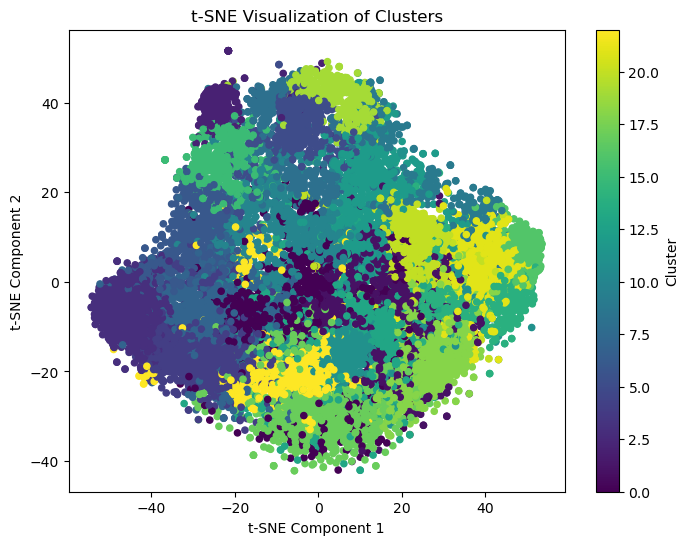

In [13]:
from sklearn.manifold import TSNE

# Assuming 'images' contains preprocessed image data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(images.reshape(images.shape[0], -1))  # Reshape images if necessary

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', s=20)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Model 1 - SVM 

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Reshape the images for SVM
num_samples = X_train.shape[0]
X_train_svm = X_train.reshape((num_samples, -1))  # Flatten images

# Create SVM classifier
svm_classifier = svm.SVC(kernel='linear')  

# Train the SVM classifier
svm_classifier.fit(X_train_svm, y_train)

# Preprocess the test images
num_test_samples = X_test.shape[0]
X_test_svm = X_test.reshape((num_test_samples, -1))  # Flatten test images

# Predict the labels for test set
predictions = svm_classifier.predict(X_test_svm)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of SVM Classifier:", accuracy)


Accuracy of SVM Classifier: 0.20998906306963178


## Hyperparameter tuning

In [17]:
# hyperparameter tuning, dont use grid search as it will take forever, use randomized search instead
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for Randomized Search
param_dist = {
    'C': randint(1, 100),  # Random values for regularization parameter C
    'kernel': ['linear', 'rbf'],  # Different kernel choices
    'gamma': [0.1, 1, 10]  # Only applicable for certain kernels like 'rbf'
}

# Instantiate Randomized Search with cross-validation (adjust n_iter and cv as needed)
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X_train_svm, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator from randomized search
best_svm = random_search.best_estimator_

# Predict using the best model
predictions = best_svm.predict(X_test_svm)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Tuned SVM Classifier:", accuracy)


Best Hyperparameters: {'C': 89, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy of Tuned SVM Classifier: 0.2008749544294568


In [21]:
#!pip install tensorflow


     -------------------------------------- 300.9/300.9 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 422.

## Model 2 - CNN

In [37]:
import tensorflow 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.initializers import GlorotUniform
from sklearn.preprocessing import LabelEncoder

np.random.seed(123)
tensorflow.random.set_seed(123)  

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(23, activation='softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 average_pooling2d_15 (Aver  (None, 13, 13, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_16 (Aver  (None, 5, 5, 64)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 average_pooling2d_17 (Aver  (None, 1, 1, 128)        

In [38]:
# Compile the model
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=256,
                    validation_data=(X_test, y_test_encoded))

Epoch 1/20
43/43 [==============================] - 3s 52ms/step - loss: 2.9063 - accuracy: 0.1694 - val_loss: 2.7316 - val_accuracy: 0.1888
Epoch 2/20
43/43 [==============================] - 2s 49ms/step - loss: 2.6509 - accuracy: 0.2139 - val_loss: 2.6506 - val_accuracy: 0.2005
Epoch 3/20
43/43 [==============================] - 2s 52ms/step - loss: 2.5644 - accuracy: 0.2336 - val_loss: 2.5327 - val_accuracy: 0.2410
Epoch 4/20
43/43 [==============================] - 2s 49ms/step - loss: 2.4729 - accuracy: 0.2632 - val_loss: 2.4855 - val_accuracy: 0.2621
Epoch 5/20
43/43 [==============================] - 2s 48ms/step - loss: 2.4201 - accuracy: 0.2771 - val_loss: 2.4463 - val_accuracy: 0.2618
Epoch 6/20
43/43 [==============================] - 2s 48ms/step - loss: 2.3868 - accuracy: 0.2814 - val_loss: 2.4280 - val_accuracy: 0.2672
Epoch 7/20
43/43 [==============================] - 2s 48ms/step - loss: 2.3409 - accuracy: 0.3001 - val_loss: 2.3869 - val_accuracy: 0.2796
Epoch 8/20
43

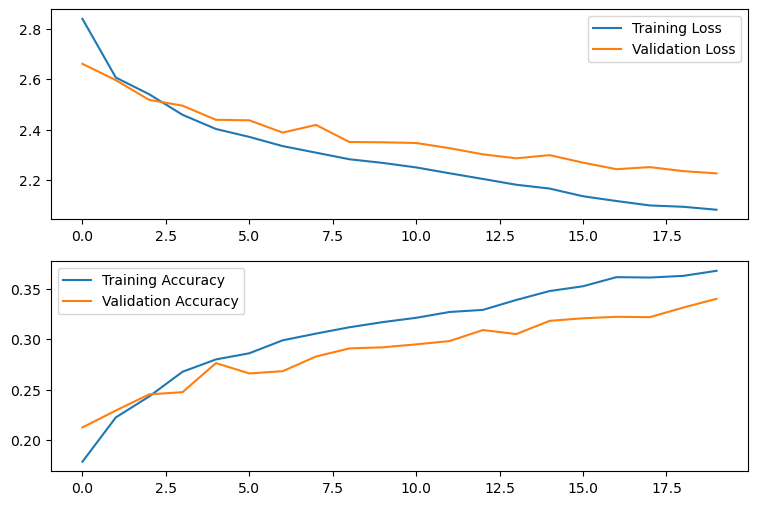

In [33]:
import pandas as pd
## Plot our history:
df = pd.DataFrame(history.history)

## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(9,6))

loss_plot = df[['loss', 'val_loss']].plot(ax=ax1[0])
accuracy_plot = df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

loss_plot.legend(['Training Loss', 'Validation Loss'])
accuracy_plot.legend(['Training Accuracy', 'Validation Accuracy'])

In [39]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)

# Print the test accuracy
print(f"Test accuracy: {test_acc}")

86/86 [==============================] - 0s 4ms/step - loss: 2.2215 - accuracy: 0.3339
Test accuracy: 0.33394095301628113


## CNN model modified

In [40]:
# modification - kernel initializer, batch normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import HeNormal
np.random.seed(123) #set the seed in numpy
tensorflow.random.set_seed(123)  #set the seed in tensorflow

# Create the CNN model
model_mod = Sequential()

model_mod.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3), kernel_initializer = 'he_normal'))
model_mod.add(BatchNormalization())
model_mod.add(AveragePooling2D((2, 2)))

model_mod.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer = 'he_normal'))
model_mod.add(BatchNormalization())
model_mod.add(AveragePooling2D((2, 2)))

model_mod.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer = 'he_normal'))
model_mod.add(BatchNormalization())
model_mod.add(AveragePooling2D((2, 2)))

model_mod.add(Flatten())
model_mod.add(Dense(128, activation='relu', kernel_initializer = 'he_normal'))
model_mod.add(Dense(23, activation='softmax'))
          
model_mod.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 average_pooling2d_18 (Aver  (None, 13, 13, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                      

In [41]:
model_mod.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history_mod = model_mod.fit(X_train, y_train_encoded, epochs=20, batch_size=256,
                    validation_data=(X_test, y_test_encoded))

Epoch 1/20
43/43 [==============================] - 5s 76ms/step - loss: 2.6399 - accuracy: 0.2467 - val_loss: 2.9213 - val_accuracy: 0.1910
Epoch 2/20
43/43 [==============================] - 3s 71ms/step - loss: 2.2662 - accuracy: 0.3253 - val_loss: 2.8358 - val_accuracy: 0.2144
Epoch 3/20
43/43 [==============================] - 3s 72ms/step - loss: 2.1070 - accuracy: 0.3706 - val_loss: 2.8377 - val_accuracy: 0.1444
Epoch 4/20
43/43 [==============================] - 3s 70ms/step - loss: 1.9869 - accuracy: 0.4011 - val_loss: 2.8941 - val_accuracy: 0.1170
Epoch 5/20
43/43 [==============================] - 3s 73ms/step - loss: 1.8832 - accuracy: 0.4278 - val_loss: 2.7412 - val_accuracy: 0.1768
Epoch 6/20
43/43 [==============================] - 3s 71ms/step - loss: 1.7973 - accuracy: 0.4521 - val_loss: 2.6645 - val_accuracy: 0.2166
Epoch 7/20
43/43 [==============================] - 3s 73ms/step - loss: 1.7090 - accuracy: 0.4811 - val_loss: 2.6347 - val_accuracy: 0.2322
Epoch 8/20
43

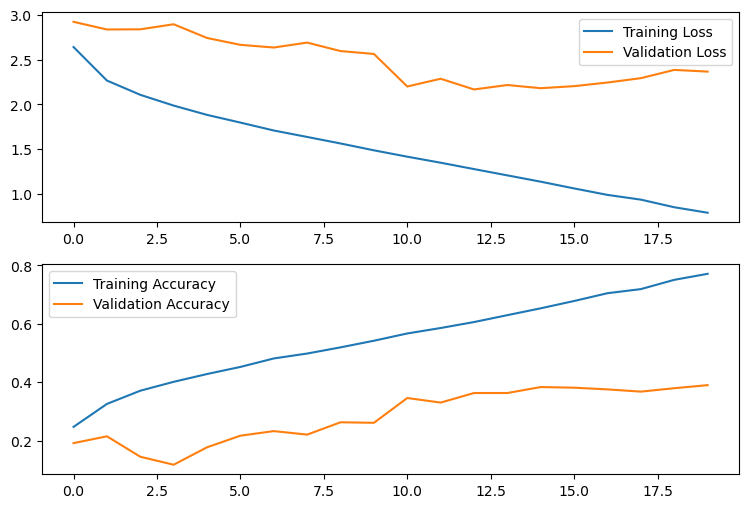

In [42]:
## Plot our history:
df = pd.DataFrame(history_mod.history)

## Plot our history:
fig, ax1 = plt.subplots(2,1, figsize=(9,6))

loss_plot = df[['loss', 'val_loss']].plot(ax=ax1[0])
accuracy_plot = df[['accuracy', 'val_accuracy']].plot(ax=ax1[1])

loss_plot.legend(['Training Loss', 'Validation Loss'])
accuracy_plot.legend(['Training Accuracy', 'Validation Accuracy'])

In [43]:
# Evaluate the model on the test set
test_loss, test_acc = model_mod.evaluate(X_test, y_test_encoded)

# Print the test accuracy
print(f"Test accuracy: {test_acc}")

86/86 [==============================] - 0s 5ms/step - loss: 2.3659 - accuracy: 0.3897
Test accuracy: 0.38971927762031555


## Additional visualization

86/86 [==============================] - 1s 5ms/step


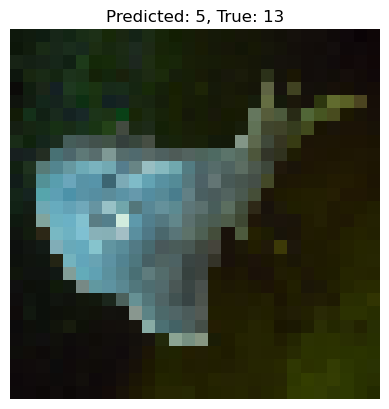

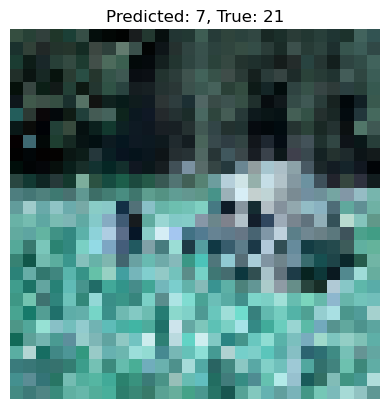

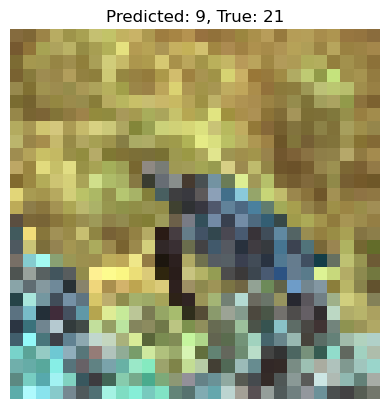

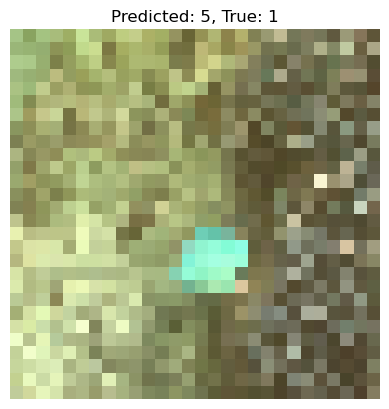

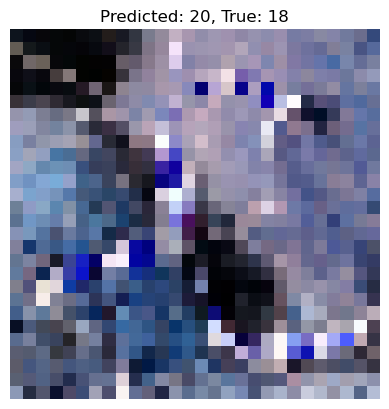

In [44]:
# Predict classes for the test set using the modified model
y_pred_mod_probabilities = model_mod.predict(X_test)

# Convert probabilities to class labels
y_pred_mod = np.argmax(y_pred_mod_probabilities, axis=1)


import matplotlib.pyplot as plt

misclassified_indexes = np.where(y_pred_mod != y_test_encoded)[0]  # Get indexes of misclassified images

num_images_to_display = 5  # Number of misclassified images to display

for i in range(num_images_to_display):
    index = misclassified_indexes[i]
    predicted_label = y_pred_mod[index]
    true_label = y_test_encoded[index]
    misclassified_image = X_test[index]  # Assuming X_test contains the test images

    # Display the misclassified image along with predicted and true labels
    plt.imshow(misclassified_image)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()


## Improving the CNN model
1. Increase Model Complexity:
Increase the model's capacity by adding more layers, increasing the number of neurons or filters, or introducing more convolutional or dense layers.

2. Hyperparameter Tuning:
Experiment with different hyperparameters such as learning rate, batch size, optimizer, kernel sizes, activation functions, and dropout rates. Use techniques like grid search or random search to find optimal values.